# Capstone Project - The Battle of Neighborhoods (Week 2)

## Title - Chennai Restaurant Recommander

This project is **Chennai Restaurant Recommender** where i have attempted to analyze Chennai's food through Zomato's dataset.

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 4.2MB/s 
     |████████████████████████████████| 10.9MB 14.1MB/s 
     |████████████████████████████████| 14.7MB 272kB/s 


In [2]:
import numpy as np  
import pandas as pd 
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud
import geopandas as gpd

**Zomato Chennai Listings - 2020**

This is zomato restaurants dataset.

In [4]:
df = pd.read_csv('Zomato Chennai Listing 2020.csv')
df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


**Preprocess the Data**


Clean the dataset and impute with NaN values



In [7]:
df.replace(to_replace = ['None','Invalid','Does not offer Delivery','Does not offer Dining','Not enough Delivery Reviews','Not enough Dining Reviews'], value =np.nan,inplace=True)
df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes               9641
Price for 2                 0
Dining Rating            5351
Dining Rating Count      5351
Delivery Rating          5851
Delivery Rating Count    5851
Features                    0
dtype: int64

In [8]:
df['name of restaurant'] = df['Name of Restaurant'].apply(lambda x: x.lower())
df['Top Dishes'] = df["Top Dishes"].astype(str)
df['Top Dishes'] = df['Top Dishes'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Cuisine'] = df["Cuisine"].astype(str)
df['Cuisine'] = df['Cuisine'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Features'] = df['Features'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Dining Rating Count'] = df['Dining Rating Count'].astype("Float32")
df['Delivery Rating Count'] = df['Delivery Rating Count'].astype("Float32")

In [9]:
def locsplit(x):
    if len(x.split(','))==2:
        return x.split(',')[1].replace(' ','')
    else:
        return x

df['Location_2'] = df['Location'].apply(lambda x: locsplit(x))

In [10]:
print(len(df['Location'].unique()))
print(len(df['Location_2'].unique()))

268
140


In [11]:
print(df['Location_2'].unique().tolist())

['Pallavaram', 'Alandur', 'Kodambakkam', 'Perambur', 'Medavakkam', 'Navallur', 'Anna Nagar East', 'T. Nagar', 'Velachery', 'Vadapalani', 'Porur', 'Kilpauk', 'Purasavakkam', 'Ashok Nagar', 'Chetpet', 'Aminijikarai', 'Ramapuram', 'Mylapore', 'Thuraipakkam', 'RA Puram', 'Alwarpet', 'Mogappair', 'West Mambalam', 'Adyar', 'Nungambakkam', 'Royapettah', 'Chromepet', 'Kolathur', 'Valasaravakkam', 'Guindy', 'Potheri', 'Egmore', 'Madipakkam', 'Thiruvanmiyur', 'Saligramam', 'Sholinganallur', 'Perungudi', 'Besant Nagar', 'Kotturpuram', 'Semmancheri', 'Royapuram', 'Anna Nagar West', 'Grand by GRT Hotels', 'Ambattur', 'Thousand Lights', 'Kanathur', 'Washermenpet', 'Selaiyur', 'Old Mahabalipuram Road (OMR)', 'Choolaimedu', 'Abhiramapuram', 'Triplicane', 'Poonamalle', 'Gopalapuram', 'East Coast Road (ECR)', 'Kandanchavadi', 'Palavakkam', 'BesantNagar', 'Neelangarai', 'GST Road', 'MRC Nagar', 'T.Nagar', 'RKSalai(CathedralRoad)', 'EastCoastRoad(ECR)', 'Somerset Greenways', 'Mahabalipuram', 'Foodies Kitc

In [12]:
feature_list = [feat.lower() for feats in df['Features'].tolist() for feat in feats]
print(len(set(feature_list)))
print(list(set(feature_list)))

101
['', 'table reservation required', 'wifi', 'standing tables', 'indoor seating', 'wheelchair accessible', ' wine', ' variable menu', ' bulk orders accepted', ' delivery only', 'breakfast', ' board games', ' beer', ' serves jain food', 'wine and beer', 'lunch menu', ' live sports screening', ' pre-ordering required', ' pool table', ' desserts and bakes', ' group meal', ' dance floor', ' wine and beer', ' serves alcohol', 'valet parking available', ' kid friendly', ' outdoor seating', ' smoking area', ' poolside', 'outdoor seating', 'desserts and bakes', ' home delivery', 'home baker', ' live entertainment', ' nightlife', ' private dining area available', ' valet parking available', ' table booking for groups', ' live music', ' self service', ' free wifi', ' table reservation required', ' above 18 only', ' vegan options', ' indoor seating', 'delivery only', ' restricted entry', ' sports tv', ' disabled friendly', ' pet friendly', 'board games', ' lunch menu', ' home baker', ' gluten f

Chennai Restaurants - Location wise

In [13]:
fig = go.Figure(data=[go.Bar(
                x = df['Location_2'].value_counts()[:20].index.tolist(),
                y = df['Location_2'].value_counts()[:20].values.tolist())])

fig.show()

*Restaurants* Franchise Details

In [14]:
df['name of restaurant'].value_counts()[:25]

ck's bakery                  83
amma unavagam                78
domino's pizza               66
oyalo                        59
lassi shop                   58
cafe coffee day              51
five star chicken            50
meat and eat                 48
a2b - adyar ananda bhavan    45
ibaco                        44
hyku foods                   41
mcrennett                    39
the cake world               39
faasos                       38
the biryani life             38
ovenstory pizza              38
sweet truth                  38
subway                       38
firangi bake                 37
the good bowl                37
cake square                  36
behrouz biryani              36
mumbai kulfi                 36
pizza square                 34
sri krishna sweets           33
Name: name of restaurant, dtype: int64

Rating Distribution Location wise


Dine only Ratings

In [15]:
bins_r = [0,2.5,4,5]
group_r = ['bad','good','best']
df['Dining Rating'] = df['Dining Rating'].astype(float)
df['Dine_Verdict'] = pd.cut(df['Dining Rating'],bins_r,labels=group_r)
yv = df['Dine_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

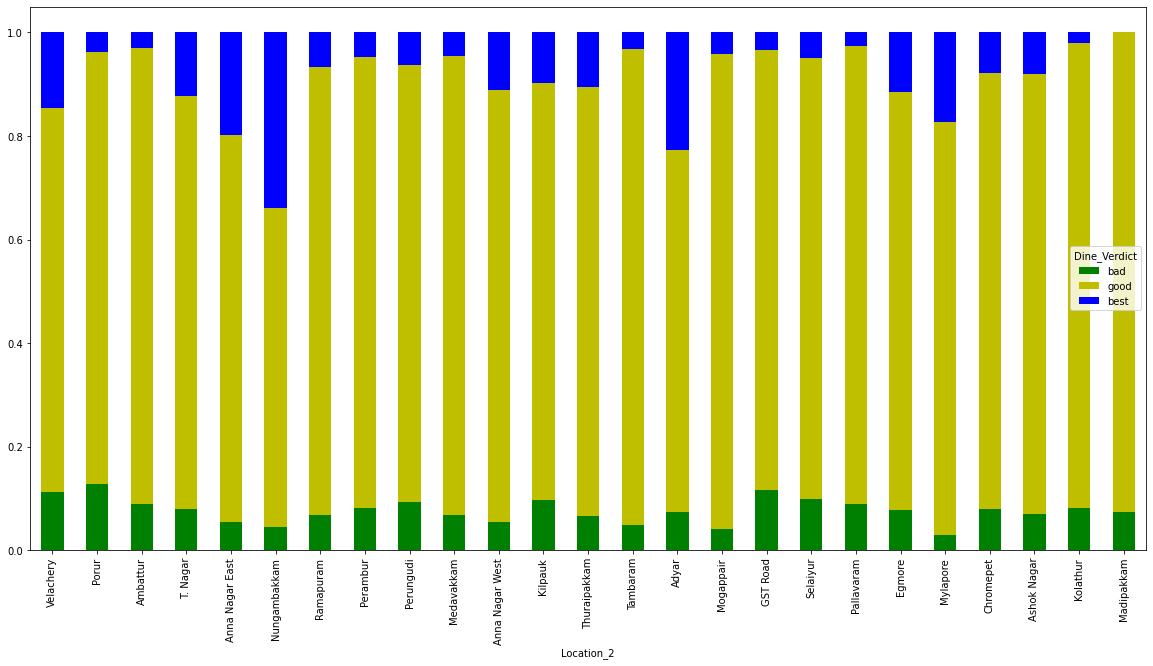

In [16]:
loc_price2 = pd.crosstab(df['Location_2'],df['Dine_Verdict'],margins=True,margins_name='Total') 
loc_price3 = loc_price2.sort_values('Total',ascending=False)[1:26]
loc_price3.drop(columns=['Total'],inplace=True)
loc_price3.div(loc_price3.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

Delivery only Rating

In [17]:
bins_r = [0,3.5,4,5]
group_r = ['bad','good','best']
df['Delivery Rating'] = df['Delivery Rating'].astype(float)
df['Delivery_Verdict'] = pd.cut(df['Delivery Rating'],bins_r,labels=group_r)
yv = df['Delivery_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

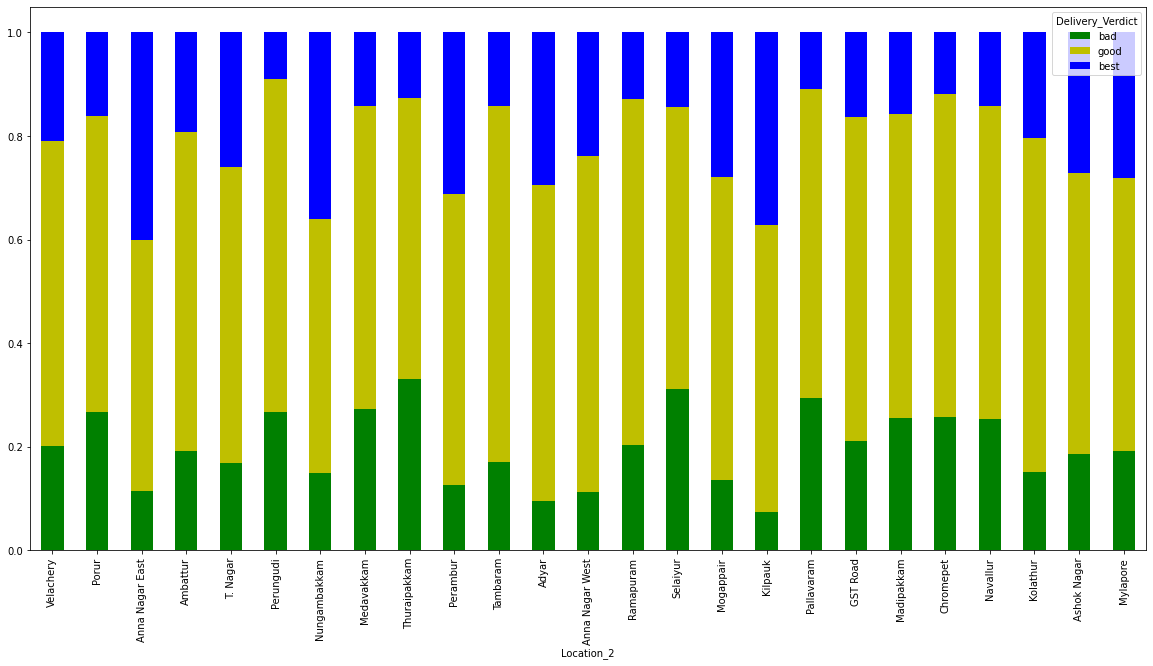

In [18]:
loc_price4 = pd.crosstab(df['Location_2'],df['Delivery_Verdict'],margins=True,margins_name='Total') 
loc_price5 = loc_price4.sort_values('Total',ascending=False)[1:26]
loc_price5.drop(columns=['Total'],inplace=True)
loc_price5.div(loc_price5.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

Price Comparision Location wise

In [19]:
bins = [0,500,1000,2500,float("inf")]
groups = ['cheap','moderate','pricey','expensive']
df['Cost'] = pd.cut(df['Price for 2'], bins,labels=groups)
yc = df['Cost'].value_counts().tolist()
colors = ['green','orange','blue','red']
fig = go.Figure(data=[go.Bar(x=groups,y=yc,marker_color=colors)])
fig.show()

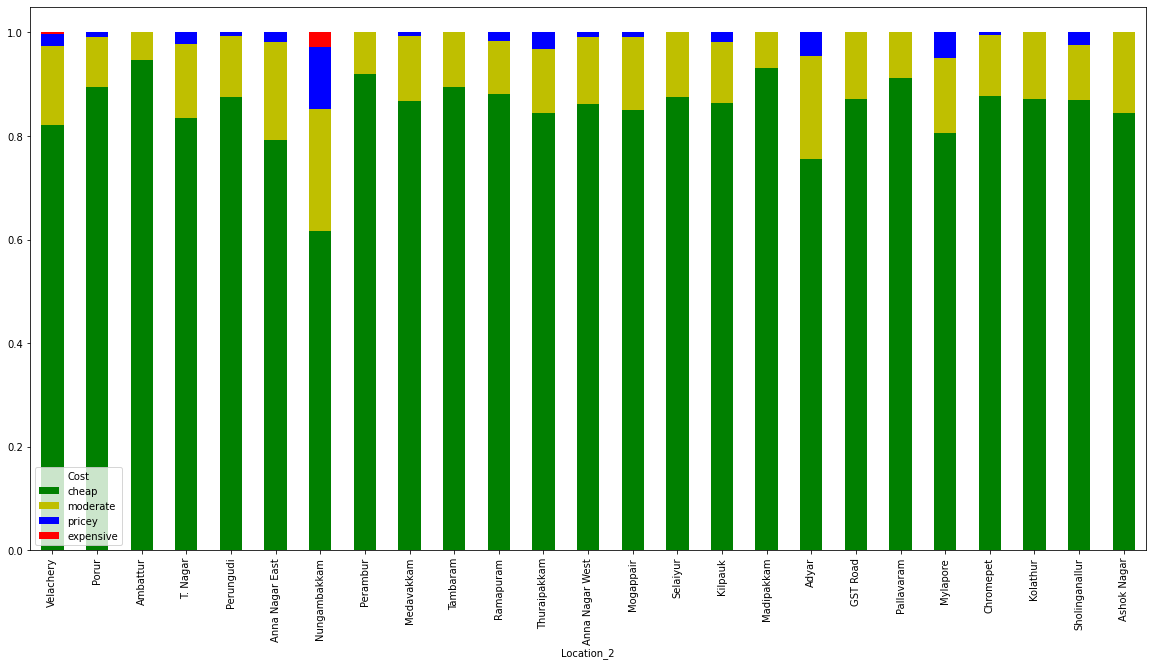

In [20]:
loc_price0 = pd.crosstab(df['Location_2'],df['Cost'],margins=True,margins_name='Total') 
loc_price1 = loc_price0.sort_values('Total',ascending=False)[1:26]
loc_price1.drop(columns=['Total'],inplace=True)
loc_price1.div(loc_price1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

Top Dishes in Chennai

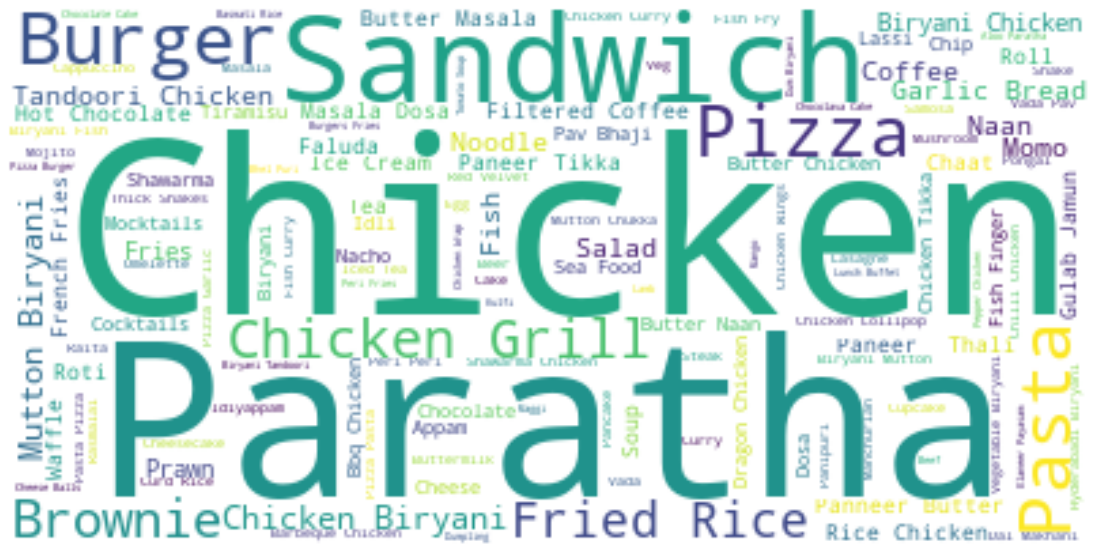

In [21]:
dishes = ' '.join(dish for dish_list in df['Top Dishes'].tolist() for dish in dish_list if dish != np.nan)
wordcloud = WordCloud(background_color='white',stopwords=['nan']).generate(dishes)
figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Popular Cuisines served in Chennai

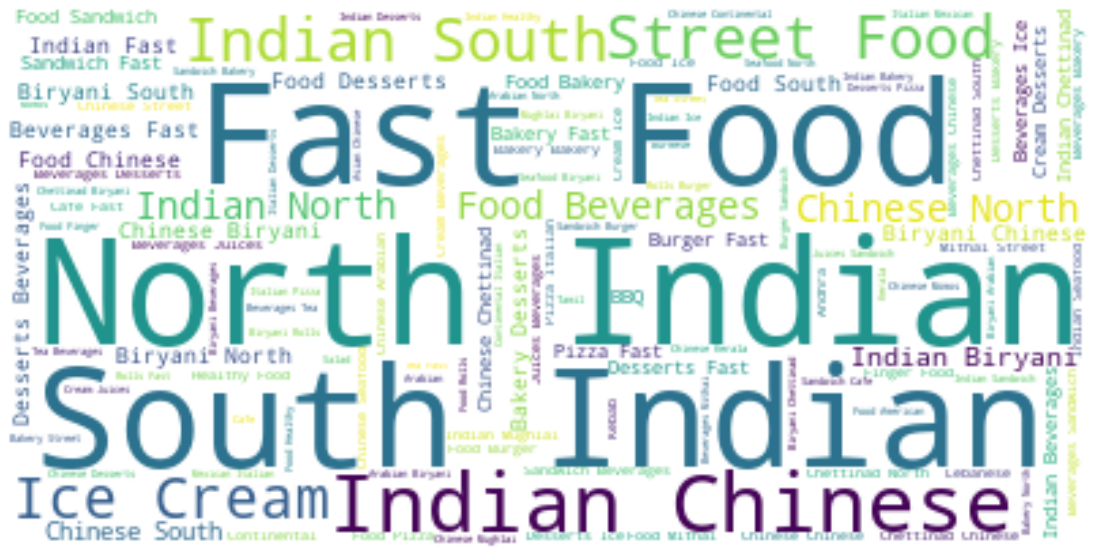

In [22]:
cuisines = ' '.join(dish for dish_list in df['Cuisine'].tolist() for dish in dish_list if dish != 'Invalid')
wordcloud = WordCloud(background_color='white').generate(cuisines)
figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Vegetarian Food in Chennai

In [23]:
def veg_status(feat_list):
    if 'Vegetarian Only' in feat_list:
        return 'Yes'
    elif ' Vegetarian Only' in feat_list:
        return 'Yes'
    else:
        return 'No'

In [24]:
df['Vegetarian Status'] = df['Features'].apply(lambda x: veg_status(x))
df['Vegetarian Status'].value_counts()

No     10202
Yes     1830
Name: Vegetarian Status, dtype: int64

In [25]:
fig = go.Figure(data=[go.Bar(
                x = df.loc[df['Vegetarian Status'] == 'Yes']['name of restaurant'].value_counts()[:10].index.tolist(),
                y = df.loc[df['Vegetarian Status'] == 'Yes']['name of restaurant'].value_counts()[:10].values.tolist())])

fig.show()

Locations with maximum Vegetarian Restaurants

In [26]:
fig = go.Figure(data=[go.Bar(
                x = df.loc[df['Vegetarian Status'] == 'Yes']['Location'].value_counts()[:10].index.tolist(),
                y = df.loc[df['Vegetarian Status'] == 'Yes']['Location'].value_counts()[:10].values.tolist())])

fig.show()

### Result Summary

Most Popular Restaurants in Chennai

In [27]:
df.loc[df['Dining Rating Count'].nlargest(10).index][['Name of Restaurant','Location_2','Dining Rating Count','Delivery Rating Count']]

,Name of Restaurant,Location_2,Dining Rating Count,Delivery Rating Count
89,Coal Barbecues,Velachery,9410.0,NaN
9233,Barbeque Nation,T. Nagar,5821.0,NaN
74,Onesta,Semmancheri,5407.0,4375.0
9030,Paradise Biryani,Perungudi,5317.0,18200.0
9026,Copper Kitchen,Porur,5073.0,26800.0
9038,Palmshore,Ramapuram,4805.0,17300.0
9040,Palmshore,Ashok Nagar,4478.0,19800.0
8757,Yaa Mohaideen Biryani,Pallavaram,3414.0,NaN
1,Sukkubhai Biriyani,Alandur,3059.0,39200.0
9039,Palmshore,Santhome,3056.0,11100.0


Explore Chennai Neighbourhood using Foursquare API

In [28]:
CLIENT_SECRET = '4W1QOJNNNXQXTONMW3RIFXJ54VKC2HFPEB0RX0LKE0J4XBDC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 100 # define radius

In [29]:
def getNearbyVenues(names, districts, cities, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, district, city, lat, lng in zip(names, districts, cities, latitudes, longitudes):
        print('Processing City: {}, District: {}, Neighborhood: {}'.format(city, district, name))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            district,
            city,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'District',
                             'City',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [ ]:
venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                         districts = neighborhoods['District'],
                         cities = neighborhoods['City'],
                         latitudes=neighborhoods['Latitude'],
                         longitudes=neighborhoods['Longitude'])